## Configuration
### Load dependencies

In [43]:
import tensorflow as tf
import cv2
from keras.applications import MobileNetV3Small, MobileNetV3Large
from keras.models import Model
from keras import layers, backend, metrics
from keras.layers import Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D, Lambda
import math
import os
import random
from keras.preprocessing import image
import os
import numpy as np
import matplotlib.pyplot as plt

### Configue GPUs

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
    print(gpu)

## Create dataset


In [80]:
# def load_image(path, size=(100, 100)):
#     return image.img_to_array(image.load_img(path, target_size=size))

PIXELS_SIZE = 100

def load_image(path_to_file):
    """Function that read file from file, resize and rescale numpy array"""
    img = tf.io.decode_jpeg(tf.io.read_file(path_to_file))
    return tf.image.resize(img, (PIXELS_SIZE, PIXELS_SIZE)) / 255

def preprocess_twin(input_img, val_img, label):
    if val_img == input_img:
        raise ValueError('Same images pprovided.')
    return load_image(input_img), load_image(val_img), label

In [81]:
ROOT_DIR = os.path.normpath('archive/Extracted Faces')
DIRS = os.listdir(ROOT_DIR)
triplets = []
for dir in DIRS:
    person_dir = os.path.join(ROOT_DIR, dir)
    photos = os.listdir(person_dir)
    if len(photos) < 2: continue # Ignore if there's less than 2 photos
    for i in range(len(photos) - 1):
        triplets.append(
            preprocess_twin(os.path.join(person_dir, photos[i]), #anchor
                            os.path.join(person_dir, photos[i+1]), # positive
                            np.float16(1))) # label

        # Negative pair (pair with another person's photo)
        other_dir = random.choice([d for d in DIRS if d != dir])
        other_photo = random.choice(os.listdir(os.path.join(ROOT_DIR, other_dir)))
        triplets.append(
            preprocess_twin(os.path.join(person_dir, photos[i]), #anchor
                            # random choice from other directories
                            os.path.join(ROOT_DIR, other_dir,random.choice(os.listdir(os.path.join(os.path.join(ROOT_DIR, other_dir))))), # negative
                            np.float16(0))) # label

AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'flatten'

#### Example images (positive)

1.0


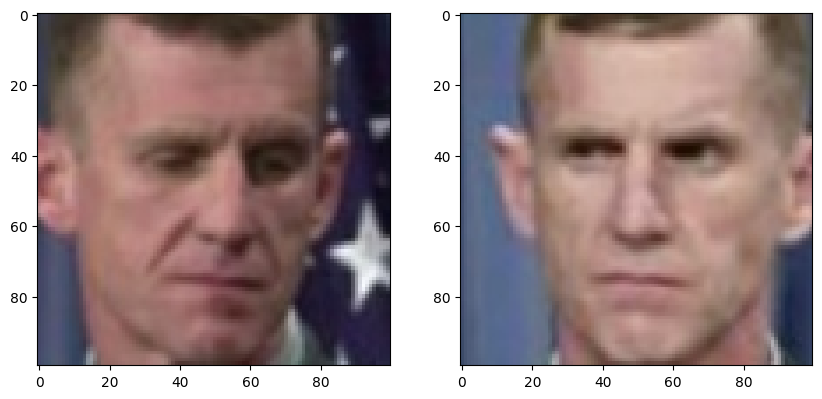

In [94]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(triplets[22][0])
axs[1].imshow(triplets[22][1])
print(triplets[22][2])

#### Example images (negative)

0.0


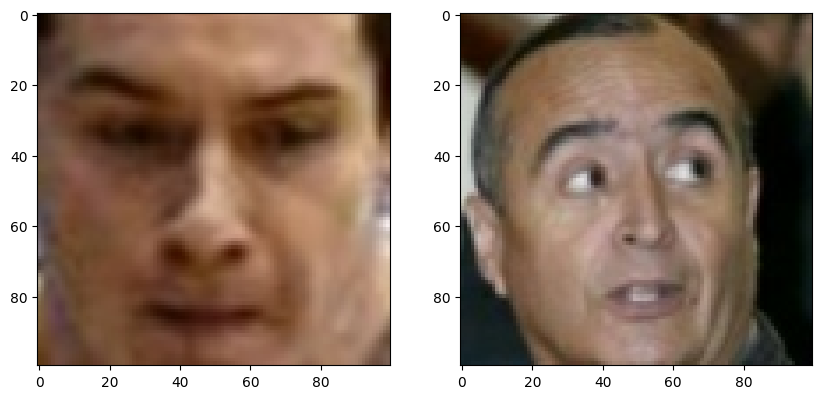

In [85]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(triplets[1][0])
axs[1].imshow(triplets[1][1])
print(triplets[1][2])